Table of Content:

<a href="#data_handling">1. Data Handling</a>
<br><a href="#data_handling1.1">1.1. Getting sense of the data</a>
<br><a href="#data_handling1.2">1.2. Univariate and Bivariate Data Exploration</a>
<br><a href="#data_handling1.3">1.3. Treatment of data for missing values</a>
<br><a href="#data_handling1.4">1.4. Categorical Data Essense</a>
<br><a href="#data_handling1.4.1">1.4.1. About Categorical Data</a>
<br><a href="#data_handling1.4.2">1.4.2. Treatment Techniques for Categorical Data</a>
<br><a href="#data_handling1.4.3">1.4.3. One hot encoding implementation</a>
<br><a href="#data_handling1.5">1.5. Data Scaling</a>
<br><br><a href="#model_training2">2. Model Training</a>
<br><a href="#model_training2.1">2.1. What is Regression?</a>
<br><a href="#model_training2.2">2.2. Linear Regression</a>
<br><a href="#model_training2.3">2.3. Ridge and Lasso Regression</a>
<br><a href="#model_training2.3.1">2.3.1. Lasso Regression Implementation</a>
<br><a href="#model_training2.3.2">2.3.2. Ridge Regression Implementation</a>
<br><br><a href="#model_stats3">3. Stats Model Interpretation and Backward Elimination Technique</a>
<br><a href="#model_stats3.1">3.1. Selection Techniques in Multiple Regression</a>
<br><a href="#model_stats3.2">3.2. How to perform backward elimination?</a>
<br><a href="#model_stats3.3">3.3. Why Stats Model Library</a>










































In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(context="notebook", palette="Spectral", style = 'darkgrid' ,font_scale = 1.5, color_codes=True)
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import os

# 1. Data Handling
<a id="data_handling" >

In [77]:
diamond_data = pd.read_csv("data/diamonds.csv")

## 1.1. Getting sense of the data
<a id="data_handling1.1" >

In [78]:
diamond_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [79]:
diamond_data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


#### There's an unecessary column which needs to be dropped

In [80]:
diamond_data = diamond_data.drop(["Unnamed: 0"],axis=1)
diamond_data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## 1.2. Univariate and Bivariate Data Exploration
<a id="data_handling1.2" >

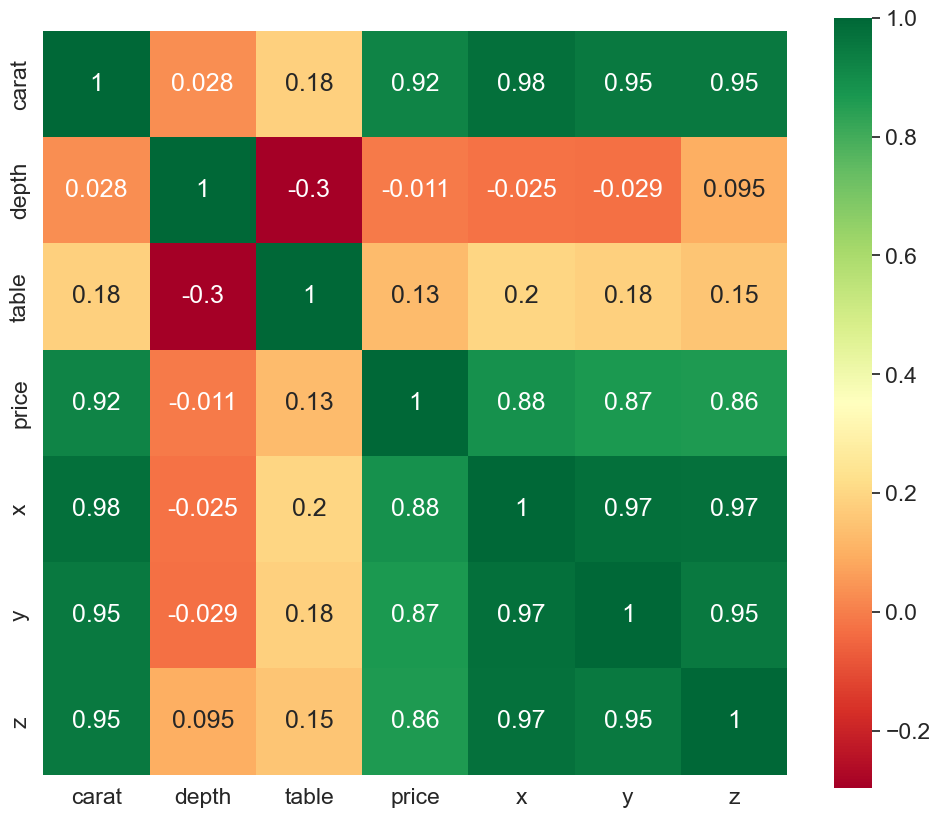

In [81]:
numeric_data = diamond_data.select_dtypes(include=[float, int])
plt.figure(figsize=(12,10))  # on this line I just set the size of figure to 12 by 10.
p=sns.heatmap(numeric_data.corr(), annot=True,cmap='RdYlGn',square=True)  # seaborn has very simple solution for heatmap

### Few observations from the above plot
1. x,y, and z have a very strong relation with price but surprisingly depth (which comes from x,y, and z) doesn't has a significant relation with price.
2. Carat has a strong relation with price
3. Table doesn't have a significant relation with price or any other variable as well ( We can try dropping that when making the model) 

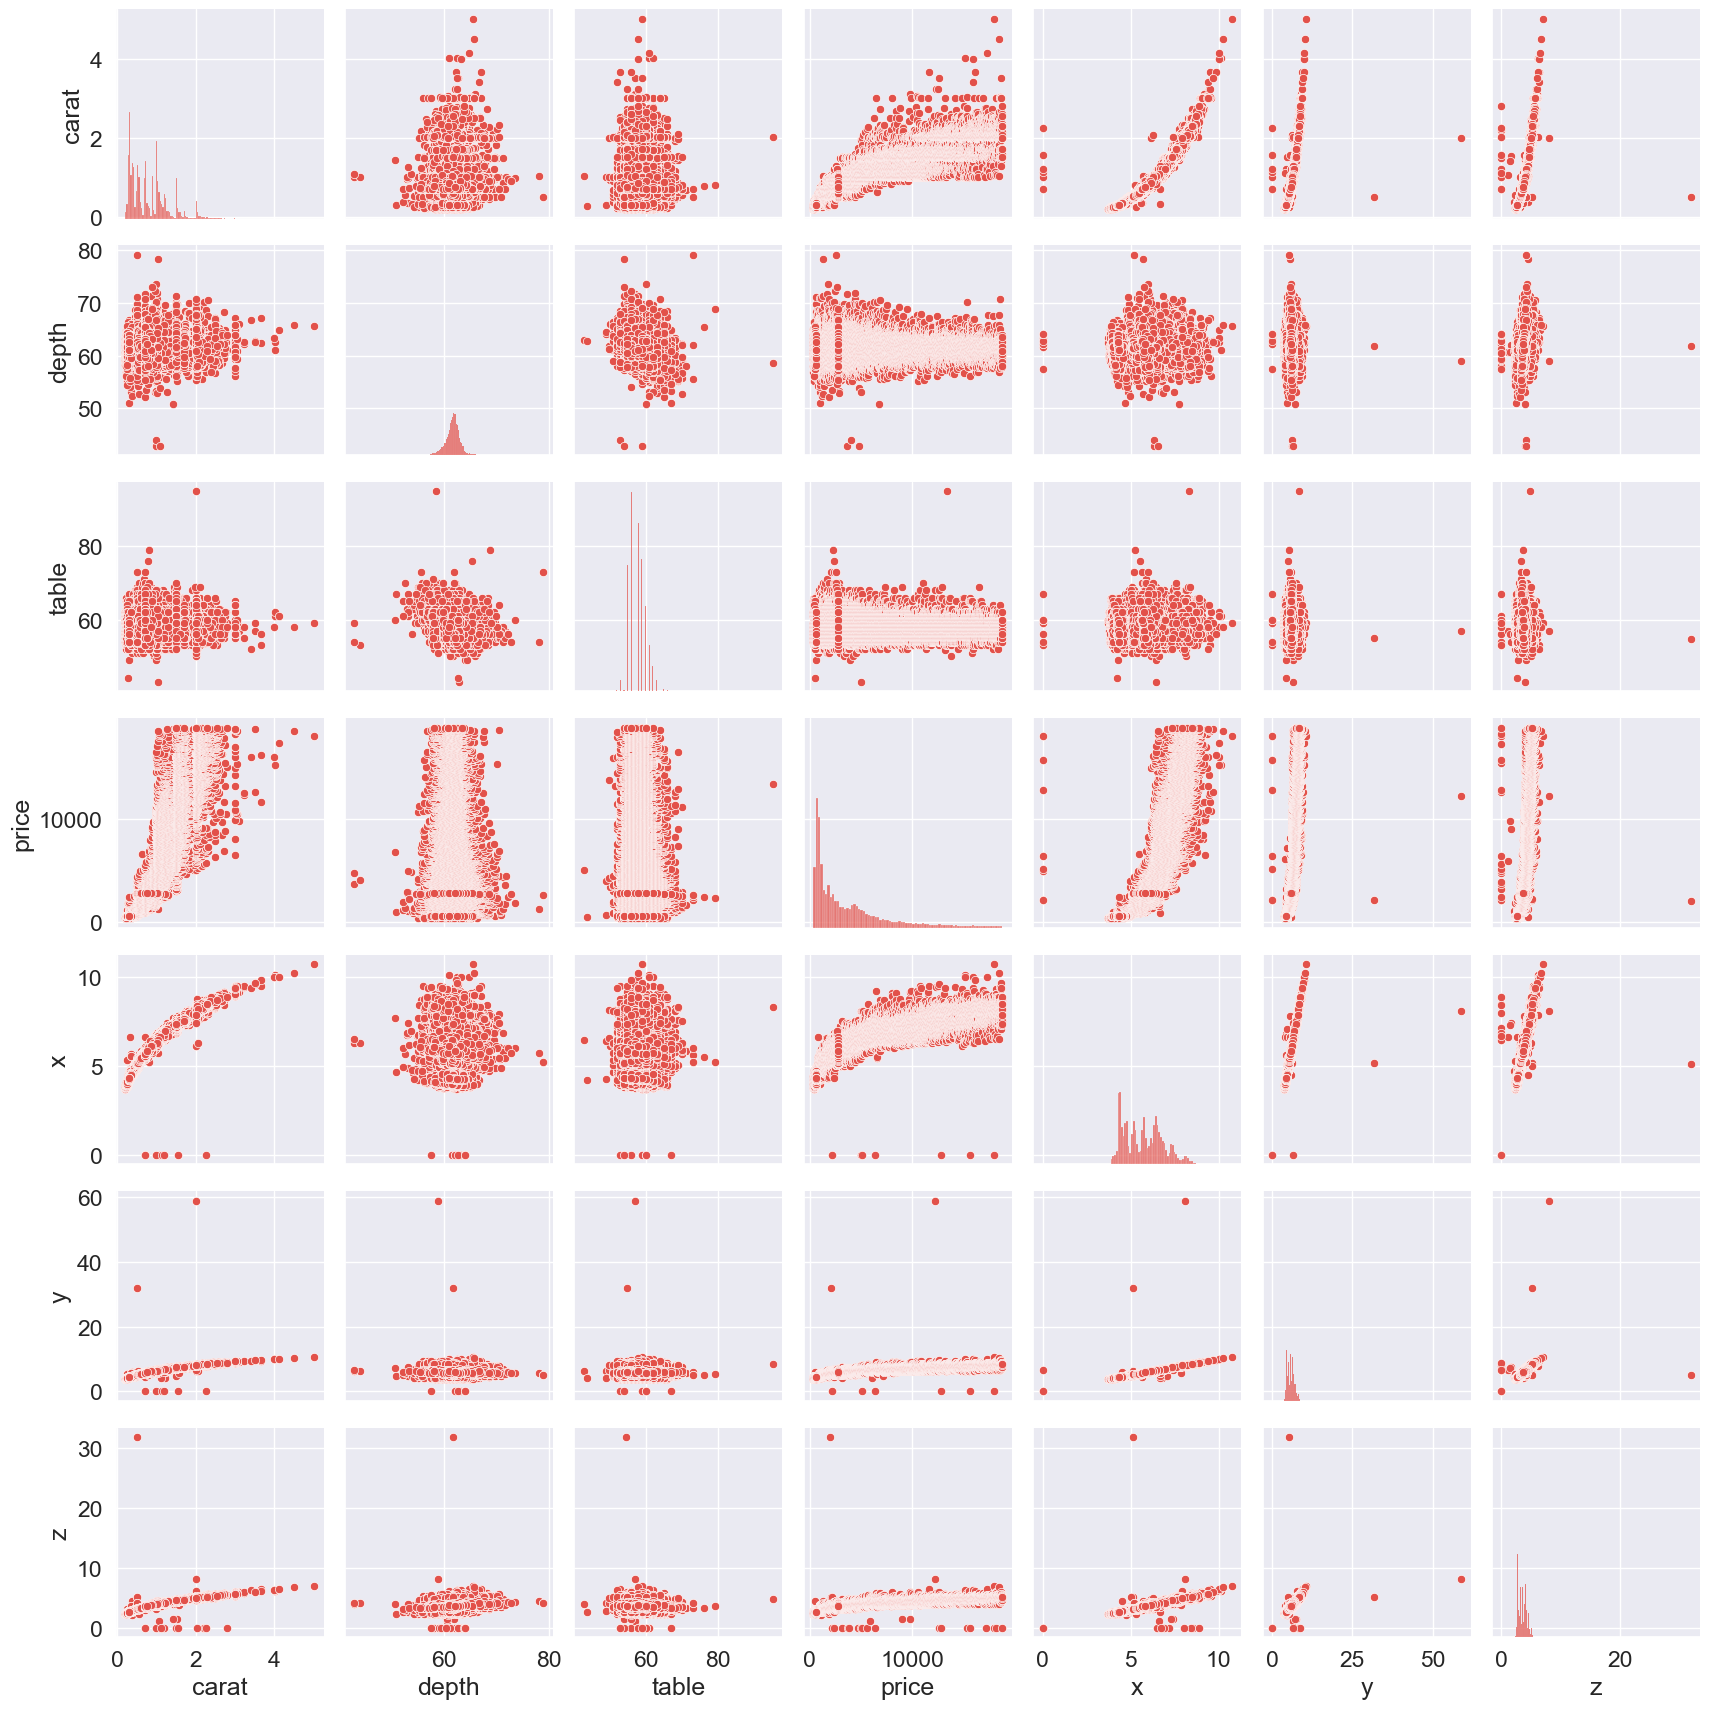

In [82]:
p=sns.pairplot(diamond_data)

In [83]:
diamond_data.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


### The minimum values for x,y and z here are 0 but it is not possible because according to the data description they are the length, width and depth

In [84]:
print("Number of rows with x == 0: {} ".format((diamond_data.x==0).sum()))
print("Number of rows with y == 0: {} ".format((diamond_data.y==0).sum()))
print("Number of rows with z == 0: {} ".format((diamond_data.z==0).sum()))
print("Number of rows with depth == 0: {} ".format((diamond_data.depth==0).sum()))

Number of rows with x == 0: 8 
Number of rows with y == 0: 7 
Number of rows with z == 0: 20 
Number of rows with depth == 0: 0 


### A zero value in these rows means missing data so we can replace the zeros with nan. Another thing to notice is that the depth column doesn't have a single zero value. We know that depth is calculated using the three parameters only.

In [85]:
diamond_data[['x','y','z']] = diamond_data[['x','y','z']].replace(0,np.NaN)

In [86]:
diamond_data.isnull().sum()

carat       0
cut         0
color       0
clarity     0
depth       0
table       0
price       0
x           8
y           7
z          20
dtype: int64

## 1.3. Treatment of data for missing values
<a id="data_handling1.3" >

In [87]:
diamond_data.dropna(inplace=True)

In [88]:
diamond_data.shape

(53920, 10)

#### Let's check if the data has any null values

In [89]:
diamond_data.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

### What to do with the zero's in x,y and z?

Since the dataset is big enough dropping 20 rows shouldn't cost us much hence the nans have been dropped.

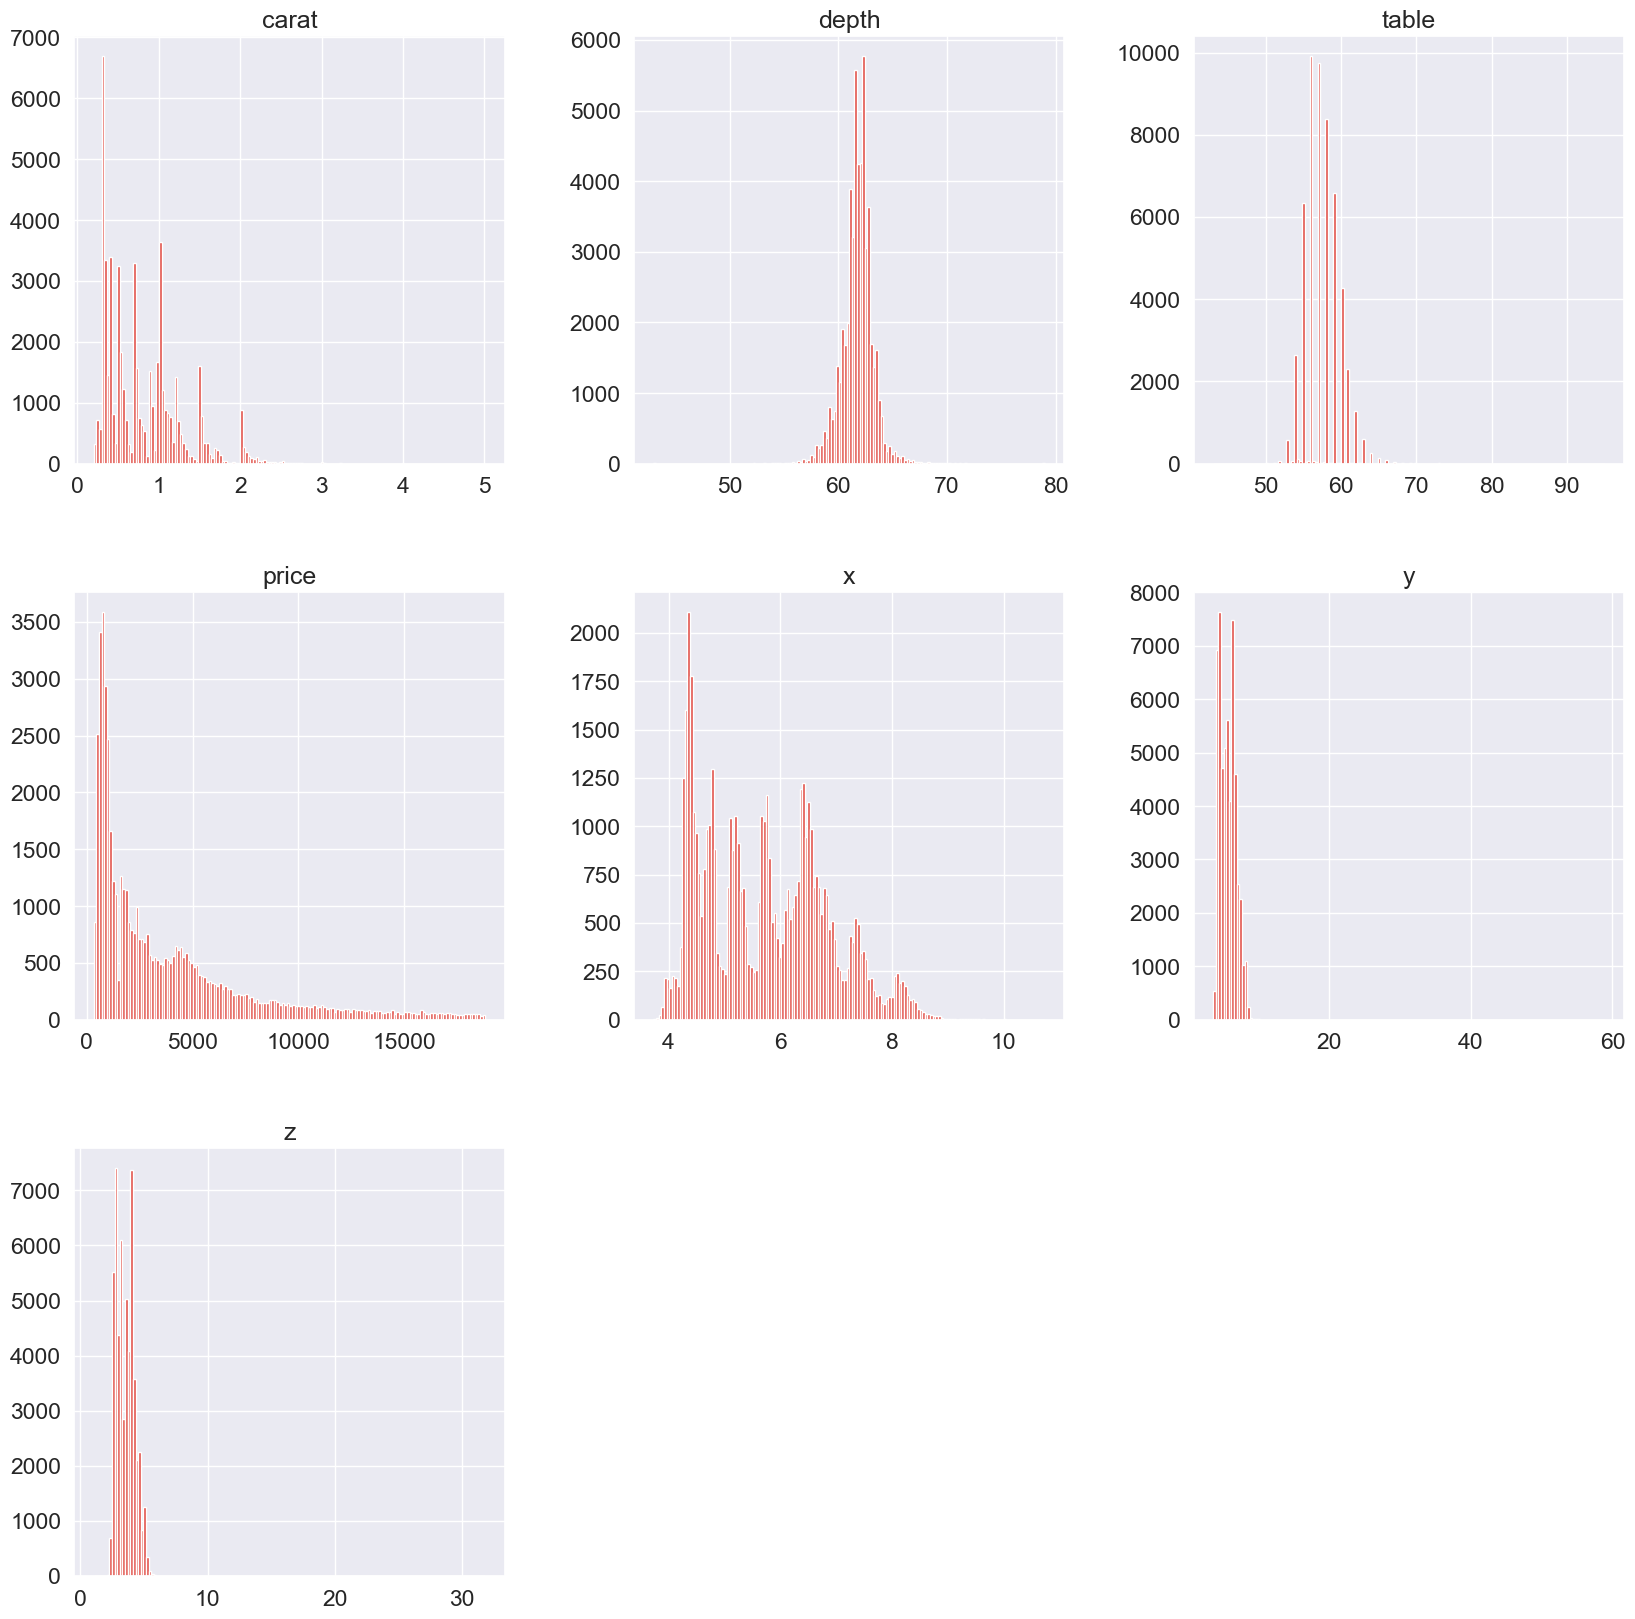

In [90]:
p = diamond_data.hist(figsize = (20,20),bins=150)

## 1.4. Categorical Data Essense
<a id="data_handling1.4" >

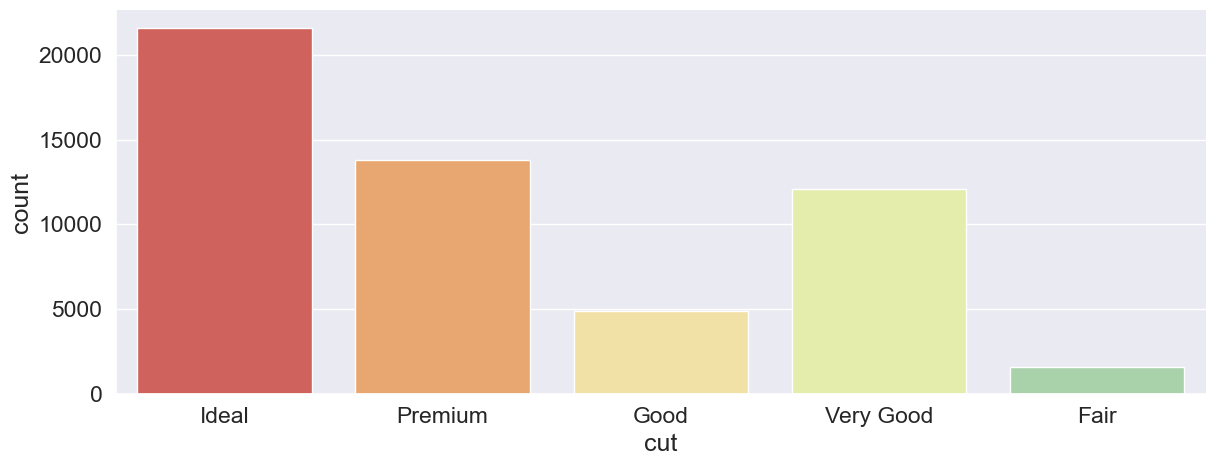

In [91]:
p = sns.catplot(x='cut', data=diamond_data , kind='count', aspect=2.5 )

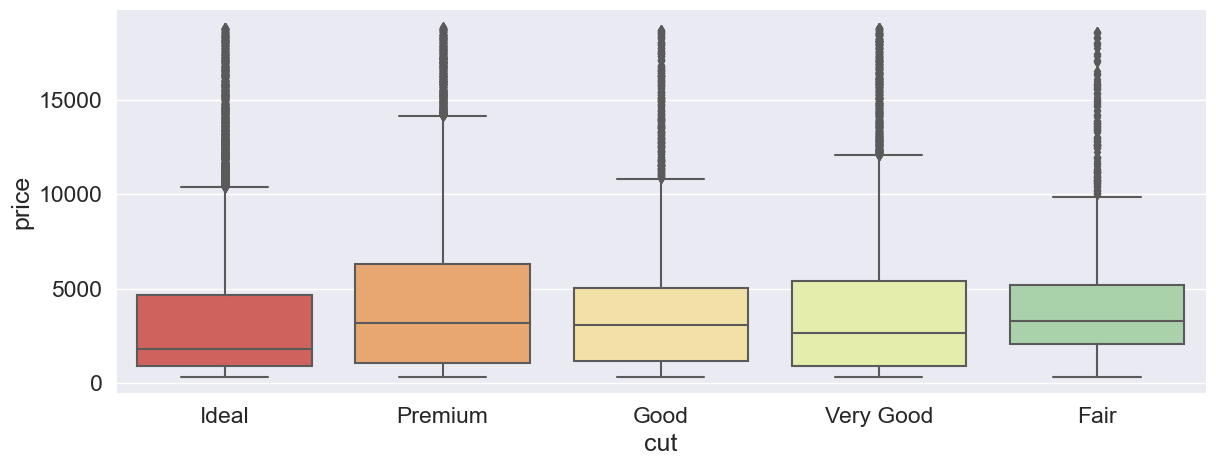

In [92]:
p = sns.catplot(x='cut', y='price', data=diamond_data, kind='box' ,aspect=2.5 )

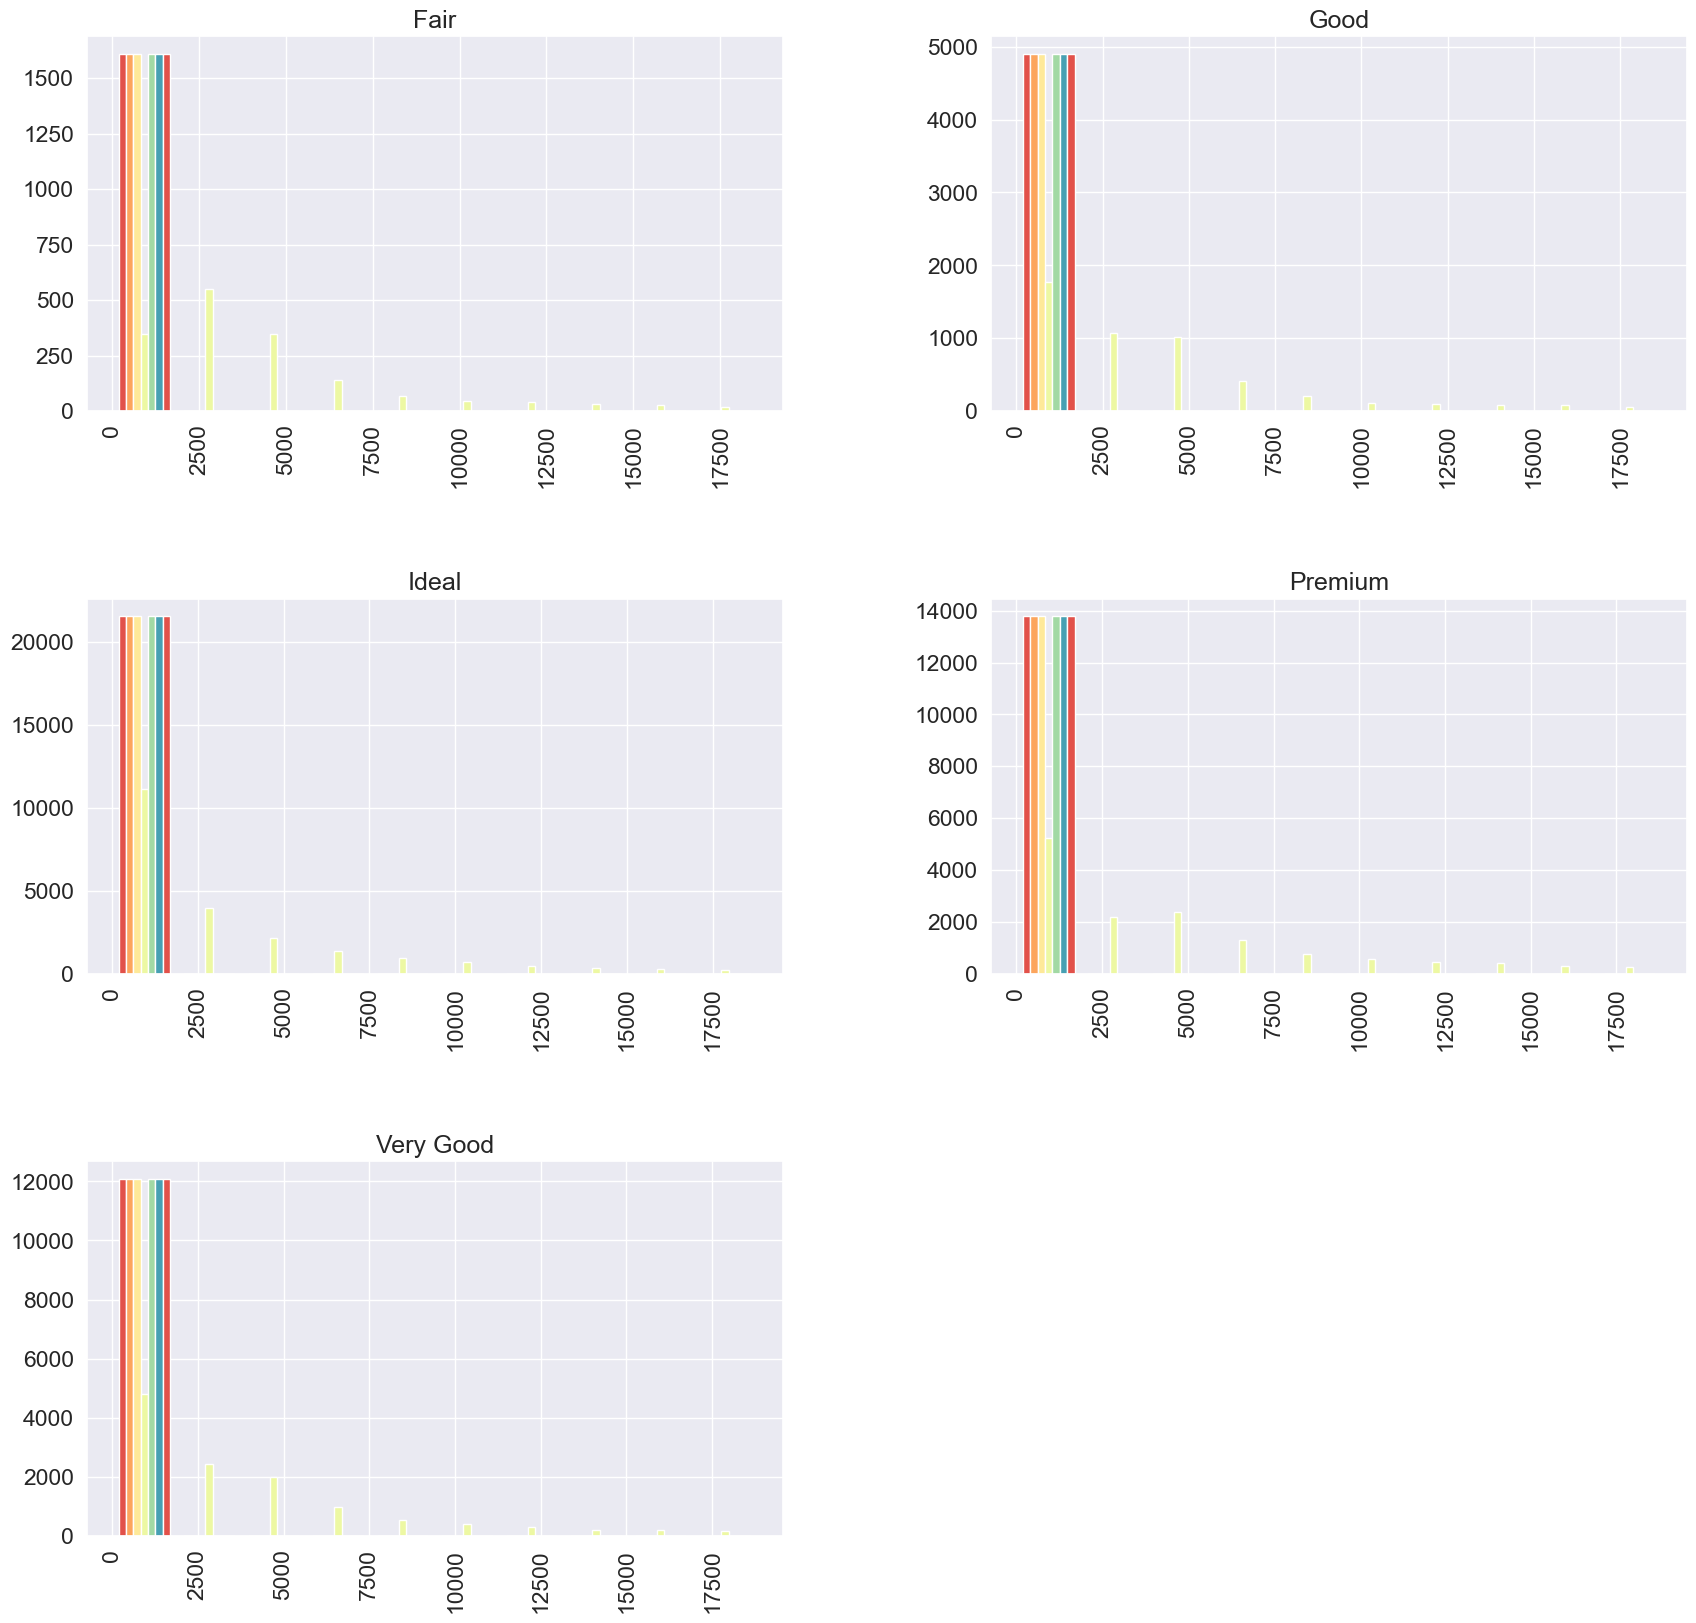

In [93]:
p = diamond_data.hist(figsize = (20,20), by=diamond_data.cut,grid=True)

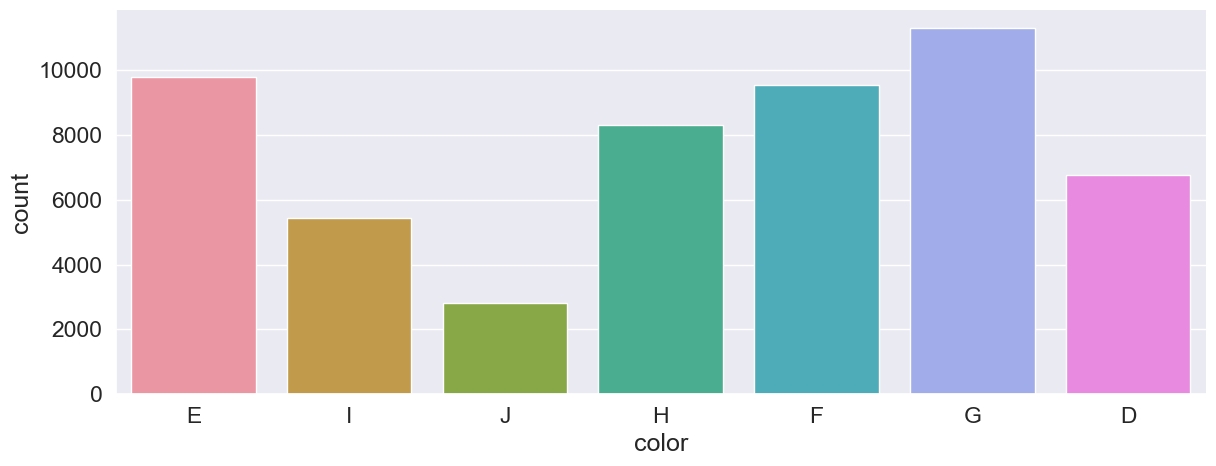

In [94]:
p = sns.catplot(x='color', data=diamond_data , kind='count',aspect=2.5 )

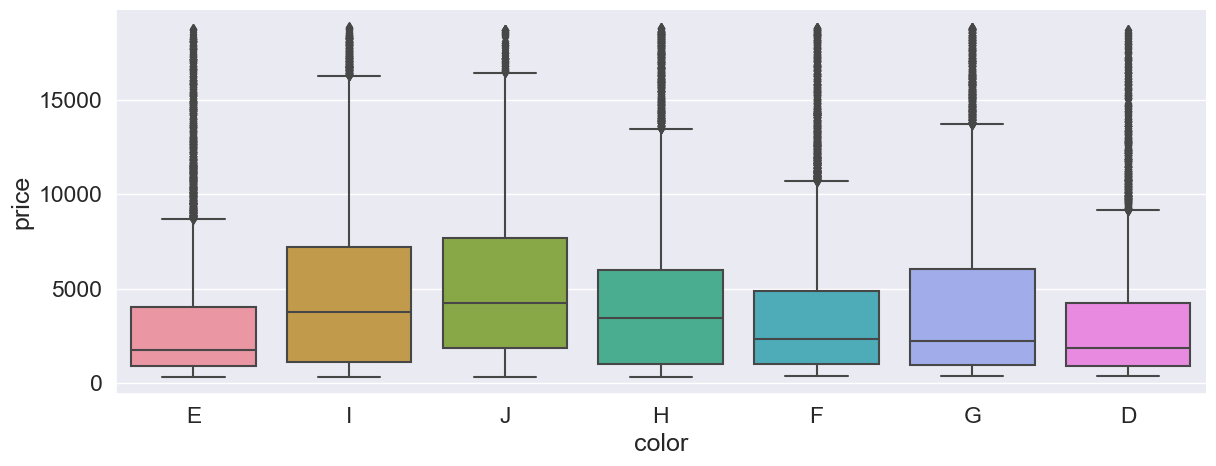

In [95]:
p = sns.catplot(x='color', y='price', data=diamond_data, kind='box' ,aspect=2.5 )

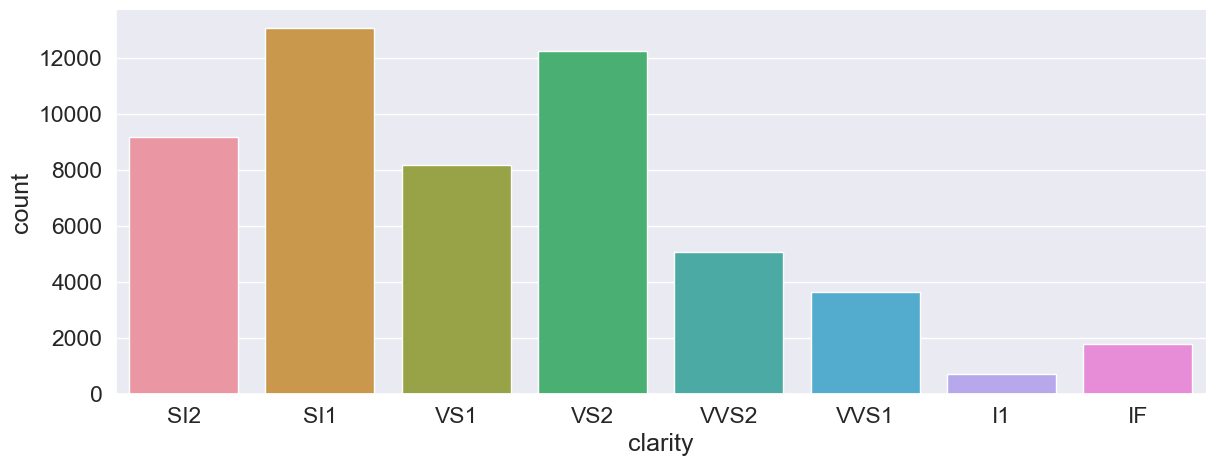

In [96]:
p = sns.catplot(x='clarity', data=diamond_data , kind='count',aspect=2.5 )

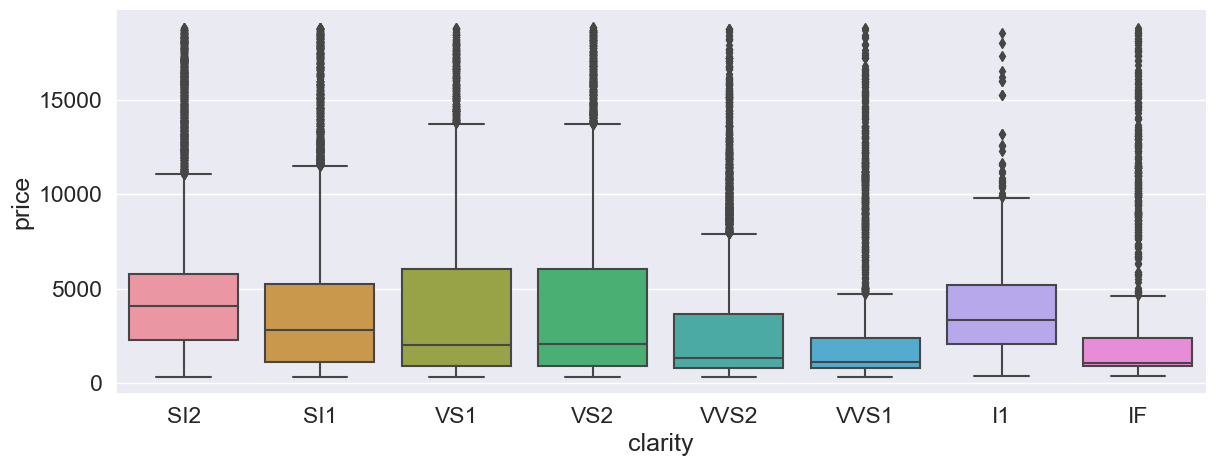

In [97]:
p = sns.catplot(x='clarity', y='price', data=diamond_data, kind='box' ,aspect=2.5)

### Mostly the median prices are very low as compared to the the highest price values for all the categories in colors, cut and clarity. The upper quartile is bigger. It shows that whichever category it may be there's a variety of diamonds that are still very expensive. 
### For example in the cut category, be it ideal, fair or any other type, there are diamonds in those categories with high prices. 

#### *It somehow makes me feel that these categories have less of an influence on the price. Please let me know in the comment section.*

#### So far so good but what about the categorical data in the columns cut,clarity and color?? The model doesn't take strings!!

## 1.4.1. About Categorical Data
<a id="data_handling1.4.1" >

## What is Categorical Data?
Categorical data are variables that contain label values rather than numeric values.

The number of possible values is often limited to a fixed set.

Categorical variables are often called nominal.

Some examples include:

A “pet” variable with the values: “dog” and “cat“.
A “color” variable with the values: “red“, “green” and “blue“.
A “place” variable with the values: “first”, “second” and “third“.
Each value represents a different category.

Some categories may have a natural relationship to each other, such as a natural ordering.

The “place” variable above does have a natural ordering of values. This type of categorical variable is called an ordinal variable.



### What is the Problem with Categorical Data?
Some algorithms can work with categorical data directly.

For example, a decision tree can be learned directly from categorical data with no data transform required (this depends on the specific implementation).

Many machine learning algorithms cannot operate on label data directly. They require all input variables and output variables to be numeric.

In general, this is mostly a constraint of the efficient implementation of machine learning algorithms rather than hard limitations on the algorithms themselves.

This means that categorical data must be converted to a numerical form. If the categorical variable is an output variable, you may also want to convert predictions by the model back into a categorical form in order to present them or use them in some application.




## 1.4.2. Treatment Techniques for Categorical Data
<a id="data_handling1.4.2" >

### How to Convert Categorical Data to Numerical Data?
This involves two steps:

### 1. Integer Encoding
As a first step, each unique category value is assigned an integer value.

For example, “red” is 1, “green” is 2, and “blue” is 3.

This is called a label encoding or an integer encoding and is easily reversible.

For some variables, this may be enough.

The integer values have a natural ordered relationship between each other and machine learning algorithms may be able to understand and harness this relationship.

For example, ordinal variables like the “place” example above would be a good example where a label encoding would be sufficient.

### 2. One-Hot Encoding
For categorical variables where no such ordinal relationship exists, the integer encoding is not enough.

In fact, using this encoding and allowing the model to assume a natural ordering between categories may result in poor performance or unexpected results (predictions halfway between categories).

In this case, a one-hot encoding can be applied to the integer representation. This is where the integer encoded variable is removed and a new binary variable is added for each unique integer value.

In the “color” variable example, there are 3 categories and therefore 3 binary variables are needed. A “1” value is placed in the binary variable for the color and “0” values for the other colors.


For further reference : https://machinelearningmastery.com/why-one-hot-encode-data-in-machine-learning/

## 1.4.3. One hot encoding implementation
<a id="data_handling1.4.3" >

### One hot encoding to the rescue!

![](https://files.realpython.com/media/Introduction-to-Python_Watermarked.48eeee4e1109.jpg)

In [98]:
one_hot_encoders_diamond_data =  pd.get_dummies(diamond_data)
one_hot_encoders_diamond_data.head()

,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,False,False,True,...,False,False,False,False,False,True,False,False,False,False
1,0.21,59.8,61.0,326,3.89,3.84,2.31,False,False,False,...,False,False,False,False,True,False,False,False,False,False
2,0.23,56.9,65.0,327,4.05,4.07,2.31,False,True,False,...,False,False,False,False,False,False,True,False,False,False
3,0.29,62.4,58.0,334,4.20,4.23,2.63,False,False,False,...,True,False,False,False,False,False,False,True,False,False
4,0.31,63.3,58.0,335,4.34,4.35,2.75,False,True,False,...,False,True,False,False,False,True,False,False,False,False


In [99]:
# a structured approach
cols = one_hot_encoders_diamond_data.columns
diamond_clean_data = pd.DataFrame(one_hot_encoders_diamond_data,columns= cols)
diamond_clean_data.head()

,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,False,False,True,...,False,False,False,False,False,True,False,False,False,False
1,0.21,59.8,61.0,326,3.89,3.84,2.31,False,False,False,...,False,False,False,False,True,False,False,False,False,False
2,0.23,56.9,65.0,327,4.05,4.07,2.31,False,True,False,...,False,False,False,False,False,False,True,False,False,False
3,0.29,62.4,58.0,334,4.20,4.23,2.63,False,False,False,...,True,False,False,False,False,False,False,True,False,False
4,0.31,63.3,58.0,335,4.34,4.35,2.75,False,True,False,...,False,True,False,False,False,True,False,False,False,False


## 1.5. Data Scaling
<a id="data_handling1.5" >

In [100]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
numericals =  pd.DataFrame(sc_X.fit_transform(diamond_clean_data[['carat','depth','x','y','z','table']]),columns=['carat','depth','x','y','z','table'],index=diamond_clean_data.index)

In [101]:
numericals.head()

,carat,depth,x,y,z,table
0,-1.198204,-0.174203,-1.591573,-1.539219,-1.580084,-1.099725
1,-1.240417,-1.361090,-1.645173,-1.662014,-1.750896,1.585988
2,-1.198204,-3.385781,-1.502241,-1.460280,-1.750896,3.376463
3,-1.071566,0.454149,-1.368242,-1.319943,-1.295396,0.243131
4,-1.029353,1.082501,-1.243176,-1.214690,-1.124583,0.243131


In [102]:
diamond_clean_data_standard = diamond_clean_data.copy(deep=True)
diamond_clean_data_standard[['carat','depth','x','y','z','table']] = numericals[['carat','depth','x','y','z','table']]

In [103]:
diamond_clean_data_standard.head()

,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,-1.198204,-0.174203,-1.099725,326,-1.591573,-1.539219,-1.580084,False,False,True,...,False,False,False,False,False,True,False,False,False,False
1,-1.240417,-1.361090,1.585988,326,-1.645173,-1.662014,-1.750896,False,False,False,...,False,False,False,False,True,False,False,False,False,False
2,-1.198204,-3.385781,3.376463,327,-1.502241,-1.460280,-1.750896,False,True,False,...,False,False,False,False,False,False,True,False,False,False
3,-1.071566,0.454149,0.243131,334,-1.368242,-1.319943,-1.295396,False,False,False,...,True,False,False,False,False,False,False,True,False,False
4,-1.029353,1.082501,0.243131,335,-1.243176,-1.214690,-1.124583,False,True,False,...,False,True,False,False,False,True,False,False,False,False


### Let's take a look at the correlation heatmap 
#### One cool thing is that when we plot before and after standardisation the stats are still that same which is just yet another sign of how useful standardisation is 

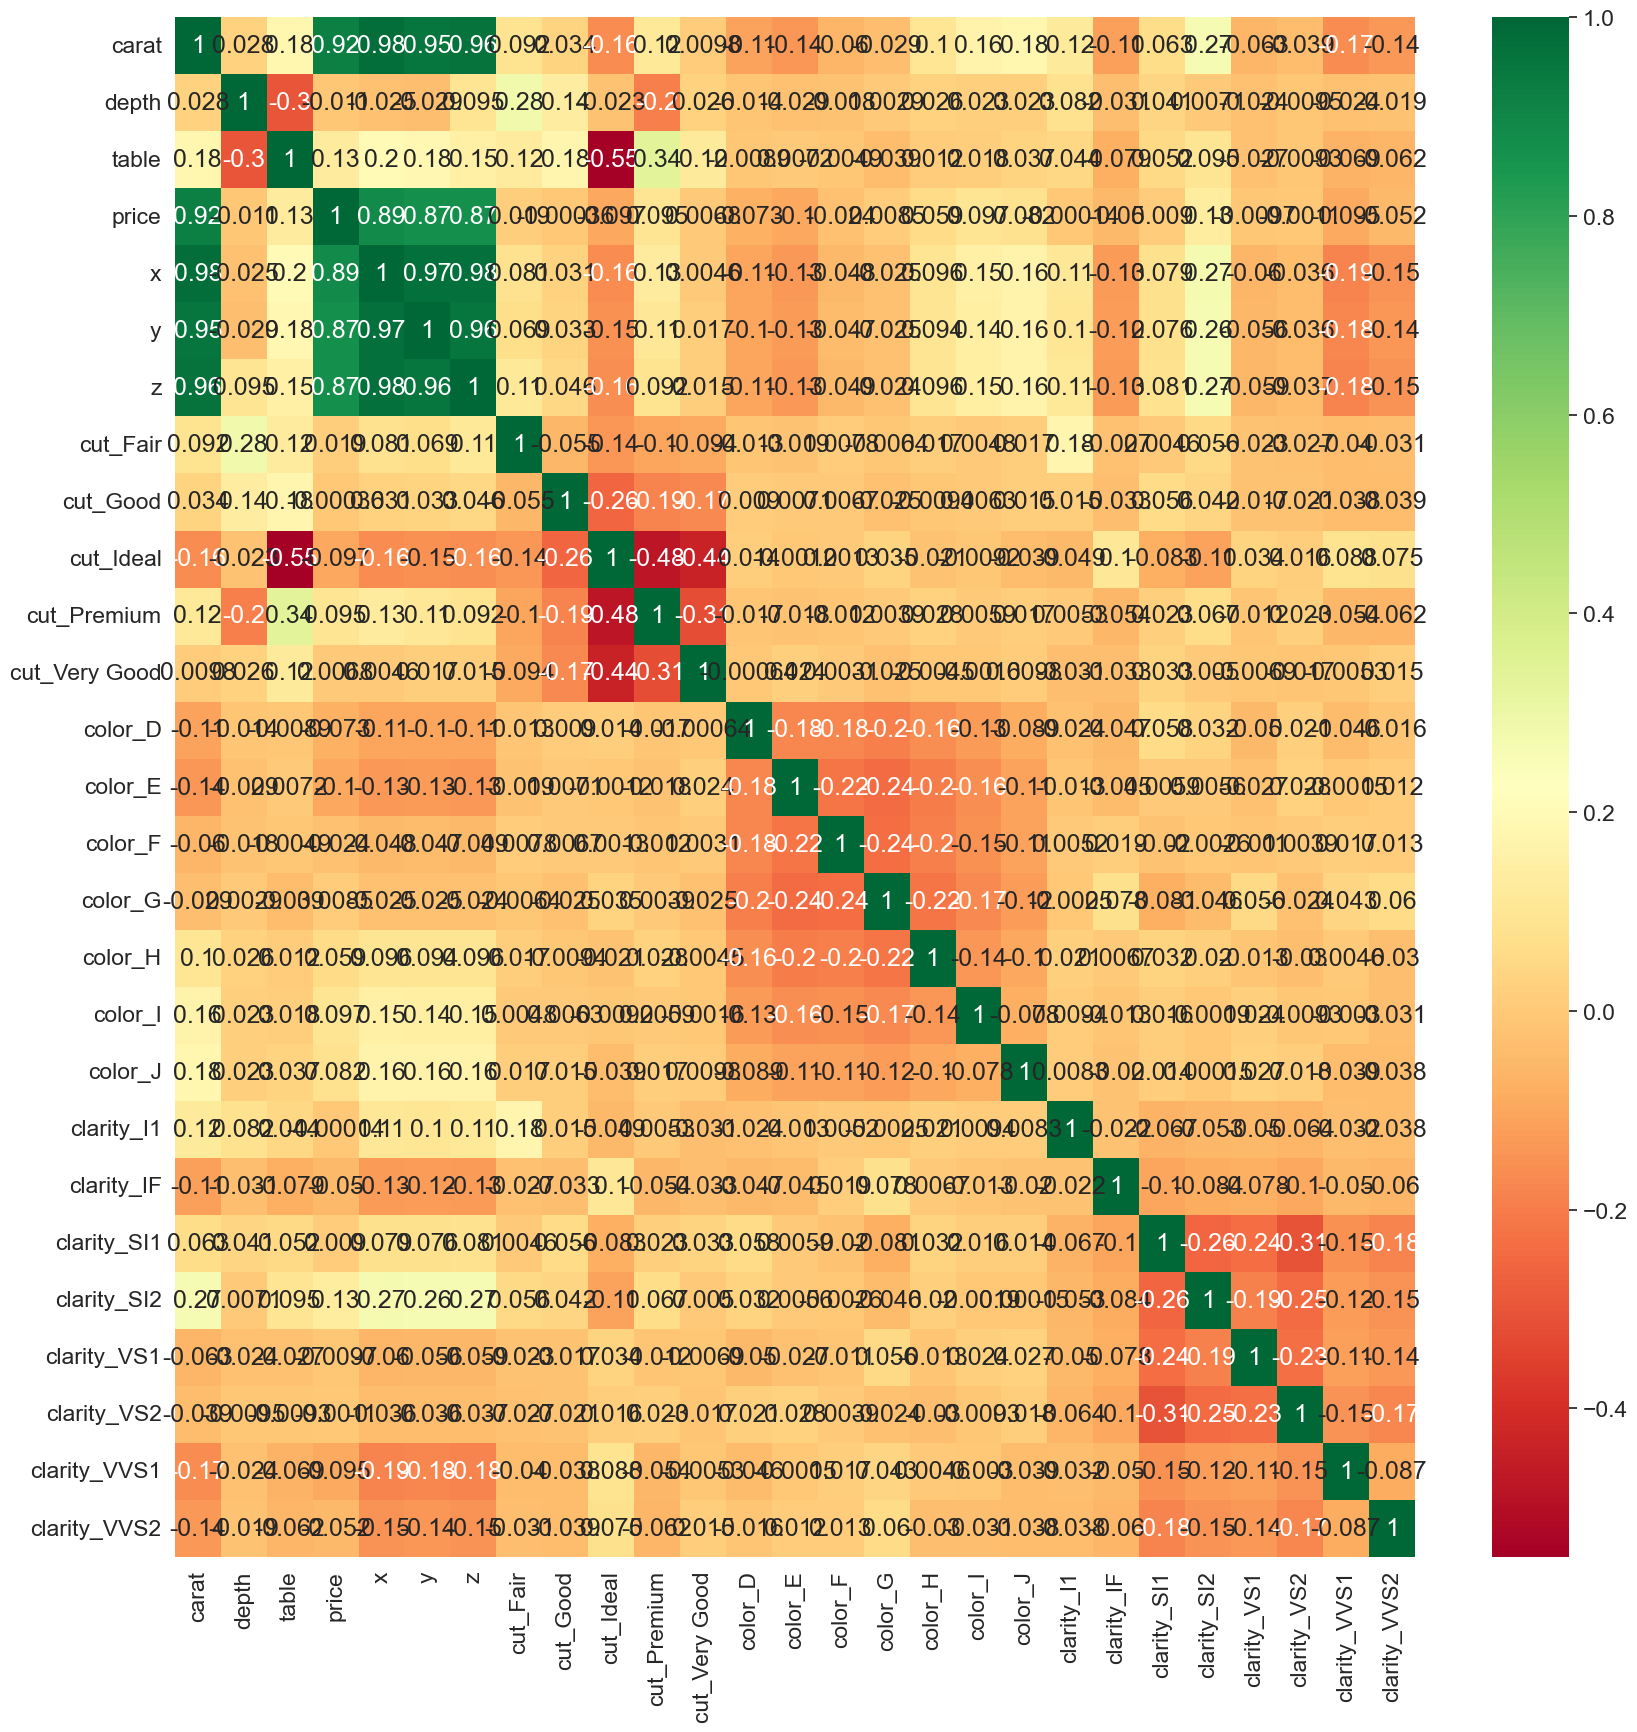

In [104]:
plt.figure(figsize=(20,20))  # on this line I just set the size of figure to 12 by 10.
p=sns.heatmap(diamond_clean_data.corr(), annot=True,cmap='RdYlGn')  # seaborn has very simple solution for heatmap

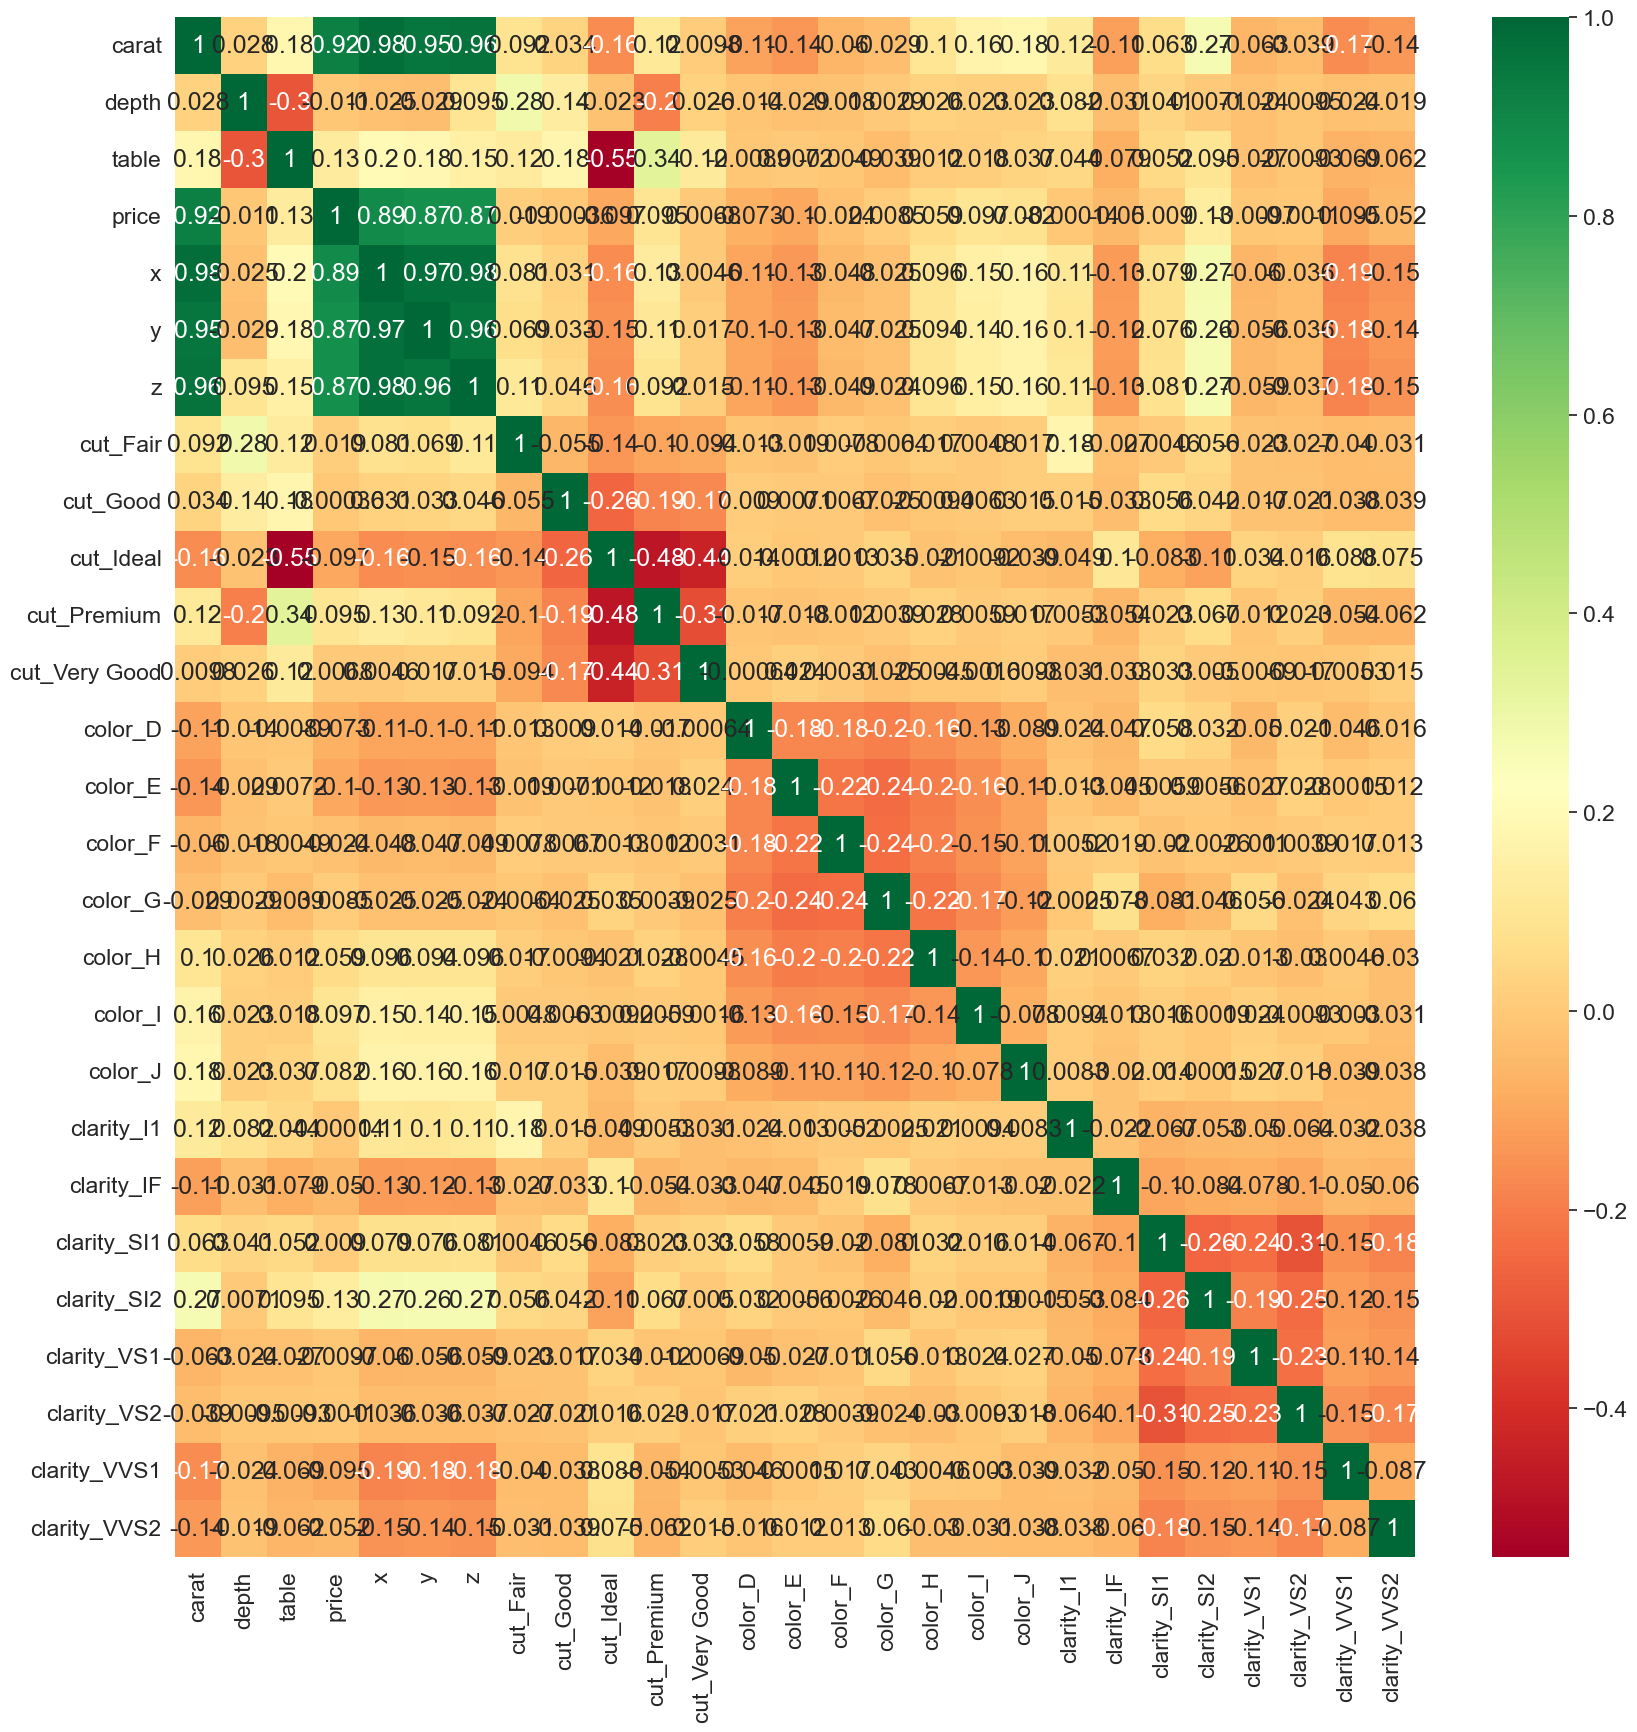

In [105]:
plt.figure(figsize=(20,20))  # on this line I just set the size of figure to 12 by 10.
p=sns.heatmap(diamond_clean_data_standard.corr(), annot=True,cmap='RdYlGn')  # seaborn has very simple solution for heatmap

### **Here we can justify the table column because is shows some correlation with the one hot encoded variables so let's not drop it**

In [106]:
x = diamond_clean_data_standard.drop(["price"],axis=1)
y = diamond_clean_data_standard.price

In [107]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x, y,random_state = 2,test_size=0.3)

# 2. Model Training
<a id="model_training2" >

## 2.1. What is Regression?
<a id="model_training2.1" >

### Regression is a statistical technique that helps in qualifying the relationship between the interrelated economic variables. The first step involves estimating the coefficient of the independent variable and then measuring the reliability of the estimated coefficient. This requires formulating a hypothesis, and based on the hypothesis, we can create a function.

If a manager wants to determine the relationship between the firm’s advertisement expenditures and its sales revenue, he will undergo the test of hypothesis. Assuming that higher advertising expenditures lead to higher sale for a firm. The manager collects data on advertising expenditure and on sales revenue in a specific period of time. This hypothesis can be translated into the mathematical function, where it leads to −

### Y = A + Bx

Where Y is sales, x is the advertisement expenditure, A and B are constant.

After translating the hypothesis into the function, the basis for this is to find the relationship between the dependent and independent variables. The value of dependent variable is of most importance to researchers and depends on the value of other variables. Independent variable is used to explain the variation in the dependent variable. It can be classified into two types −

1. Simple regression − One independent variable

2. Multiple regression − Several independent variables

1. Simple Regression
Following are the steps to build up regression analysis −

Specify the regression model
Obtain data on variables
Estimate the quantitative relationships
Test the statistical significance of the results
Usage of results in decision-making
Formula for simple regression is −

### Y = a + bX + u

Y= dependent variable

X= independent variable

a= intercept

b= slope

u= random factor

Cross sectional data provides information on a group of entities at a given time, whereas time series data provides information on one entity over time. When we estimate regression equation it involves the process of finding out the best linear relationship between the dependent and the independent variables.

## Method of Ordinary Least Squares (OLS)
Ordinary least square method is designed to fit a line through a scatter of points is such a way that the sum of the squared deviations of the points from the line is minimized. It is a statistical method. Usually Software packages perform OLS estimation.

### Y = a + bX

## Co-efficient of Determination (R2)
Co-efficient of determination is a measure which indicates the percentage of the variation in the dependent variable is due to the variations in the independent variables. R2 is a measure of the goodness of fit model. Following are the methods −

## Total Sum of Squares (TSS)
Sum of the squared deviations of the sample values of Y from the mean of Y.

### TSS = SUM ( Yi − Y)2

Yi = dependent variables

Y = mean of dependent variables

i = number of observations

## Regression Sum of Squares (RSS)
Sum of the squared deviations of the estimated values of Y from the mean of Y.

### RSS = SUM ( Ỷi − uY)2

Ỷi = estimated value of Y

Y = mean of dependent variables

i = number of variations

## Error Sum of Squares (ESS)
Sum of the squared deviations of the sample values of Y from the estimated values of Y.

### ESS = SUM ( Yi − Ỷi)2

Ỷi = estimated value of Y

Yi = dependent variables

i = number of observations




![](https://www.tutorialspoint.com/managerial_economics/images/error_sum_of_squares.jpg)

### What is R Squared?

R2 measures the proportion of the total deviation of Y from its mean which is explained by the regression model. The closer the R2 is to unity, the greater the explanatory power of the regression equation. An R2 close to 0 indicates that the regression equation will have very little explanatory power.

### R2 = RSS/TSS= 1 - ESS/TSS


![](https://www.tutorialspoint.com/managerial_economics/images/regression_equation.jpg)

## Also notice in the code below how adjusted r squared penalises for irrelevant or useless independent variables

###  Types of Regressions:
* Linear Regression
* Polynomial Regression
* Logistic Regression
* Quantile Regression
* Ridge Regression
* Lasso Regression
* ElasticNet Regression
* Principal Component Regression
* Partial Least Square Regression
* Support Vector Regression
* Ordinal Regression
* Poisson Regression
* Negative Binomial Regression
* Quasi-Poisson Regression
* Cox Regression

## 2.2. Linear Regression
<a id="model_training2.2" >

In [108]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(train_x,train_y)
y_pred = regr.predict(test_x)
print("accuracy: "+ str(regr.score(test_x,test_y)*100) + "%")
print("Mean absolute error: {}".format(mean_absolute_error(test_y,y_pred)))
print("Mean squared error: {}".format(mean_squared_error(test_y,y_pred)))
R2 = r2_score(test_y,y_pred)
print('R Squared: {}'.format(R2))
n=test_x.shape[0]
p=test_x.shape[1] - 1

adj_rsquared = 1 - (1 - R2) * ((n - 1)/(n-p-1))
print('Adjusted R Squared: {}'.format(adj_rsquared))

accuracy: 92.21078518476793%
Mean absolute error: 731.4415989248859
Mean squared error: 1222201.224070932
R Squared: 0.9221078518476793
Adjusted R Squared: 0.9219872757669482


## 2.3. Ridge and Lasso Regression
<a id="model_training2.3" >

## Ridge and Lasso regression are powerful techniques generally used for creating parsimonious models in presence of a ‘large’ number of features. 

#### Here ‘large’ can typically mean either of two things:

1. Large enough to enhance the tendency of a model to overfit (as low as 10 variables might cause overfitting)
2. Large enough to cause computational challenges. With modern systems, this situation might arise in case of millions or billions of features
Though Ridge and Lasso might appear to work towards a common goal, the inherent properties and practical use cases differ substantially. If you’ve heard of them before, you must know that they work by penalizing the magnitude of coefficients of features along with minimizing the error between predicted and actual observations. These are called ‘regularization’ techniques. The key difference is in how they assign penalty to the coefficients:

### Ridge Regression:
Performs L2 regularization, i.e. adds penalty equivalent to square of the magnitude of coefficients
Minimization objective = LS Obj + α * (sum of square of coefficients)
### Lasso Regression:
Performs L1 regularization, i.e. adds penalty equivalent to absolute value of the magnitude of coefficients
Minimization objective = LS Obj + α * (sum of absolute value of coefficients)
Note that here ‘LS Obj’ refers to ‘least squares objective’, i.e. the linear regression objective without regularization.

#### For Further Reference: https://www.analyticsvidhya.com/blog/2016/01/complete-tutorial-ridge-lasso-regression-python/

## 2.3.1. Lasso Regression Implementation
<a id="model_training2.3.1" >

In [109]:
las_reg = linear_model.Lasso()
las_reg.fit(train_x,train_y)
y_pred = las_reg.predict(test_x)
print("accuracy: "+ str(las_reg.score(test_x,test_y)*100) + "%")
print("Mean absolute error: {}".format(mean_absolute_error(test_y,y_pred)))
print("Mean squared error: {}".format(mean_squared_error(test_y,y_pred)))
R2 = r2_score(test_y,y_pred)
print('R Squared: {}'.format(R2))
n=test_x.shape[0]
p=test_x.shape[1] - 1

adj_rsquared = 1 - (1 - R2) * ((n - 1)/(n-p-1))
print('Adjusted R Squared: {}'.format(adj_rsquared))

accuracy: 92.20342856834277%
Mean absolute error: 729.91532095462
Mean squared error: 1223355.5465300158
R Squared: 0.9220342856834277
Adjusted R Squared: 0.9219135957231853


## 2.3.2. Ridge Regression Implementation
<a id="model_training2.3.2" >

In [110]:
rig_reg = linear_model.Ridge()
rig_reg.fit(train_x,train_y)
y_pred = rig_reg.predict(test_x)
print("accuracy: "+ str(rig_reg.score(test_x,test_y)*100) + "%")
print("Mean absolute error: {}".format(mean_absolute_error(test_y,y_pred)))
print("Mean squared error: {}".format(mean_squared_error(test_y,y_pred)))
R2 = r2_score(test_y,y_pred)
print('R Squared: {}'.format(R2))
n=test_x.shape[0]
p=test_x.shape[1] - 1

adj_rsquared = 1 - (1 - R2) * ((n - 1)/(n-p-1))
print('Adjusted R Squared: {}'.format(adj_rsquared))

accuracy: 92.21059025809674%
Mean absolute error: 731.4437670796457
Mean squared error: 1222231.8099029793
R Squared: 0.9221059025809675
Adjusted R Squared: 0.9219853234827956


Thanks to the resources:
1. https://www.tutorialspoint.com/managerial_economics/regression_technique.htm
2. https://udemy.com
3. https://www.r-bloggers.com/15-types-of-regression-you-should-know/
4. https://en.wikipedia.org/wiki/Stepwise_regression

## Yet to be updated